### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
!pip install scikit-fuzzy
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=fa6e45ab0d8d25b616ff71d31b1c4f81a5ef2de5ba6a7eaa9f2ac97c481390a7
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Data Acquisition

In [3]:
df=pd.read_csv("/content/drive/MyDrive/LSTM_Fuzzy_Defuzzy_DS.csv")

In [4]:
df.head(20)

,Year,Temperatue,Humidity,Wind Speed,Rainfall
0,2010,24.33,77.06,2.40,5.27
1,2010,27.08,66.12,2.22,0.00
2,2010,31.68,54.19,2.27,0.00
3,2010,33.92,53.94,2.25,26.37
4,2010,31.23,65.31,2.58,89.65
5,2010,28.65,69.38,3.20,84.38
6,2010,27.73,69.56,3.20,68.55
7,2010,27.57,74.00,2.61,163.48
8,2010,26.80,76.62,2.03,84.38
9,2010,26.35,80.19,1.78,126.56


In [5]:
df.columns

Index(['Year', 'Temperatue', 'Humidity', 'Wind Speed', 'Rainfall'], dtype='object')

### Data Preprocessing

### Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        132 non-null    int64  
 1   Temperatue  132 non-null    float64
 2   Humidity    132 non-null    float64
 3   Wind Speed  132 non-null    float64
 4   Rainfall    132 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


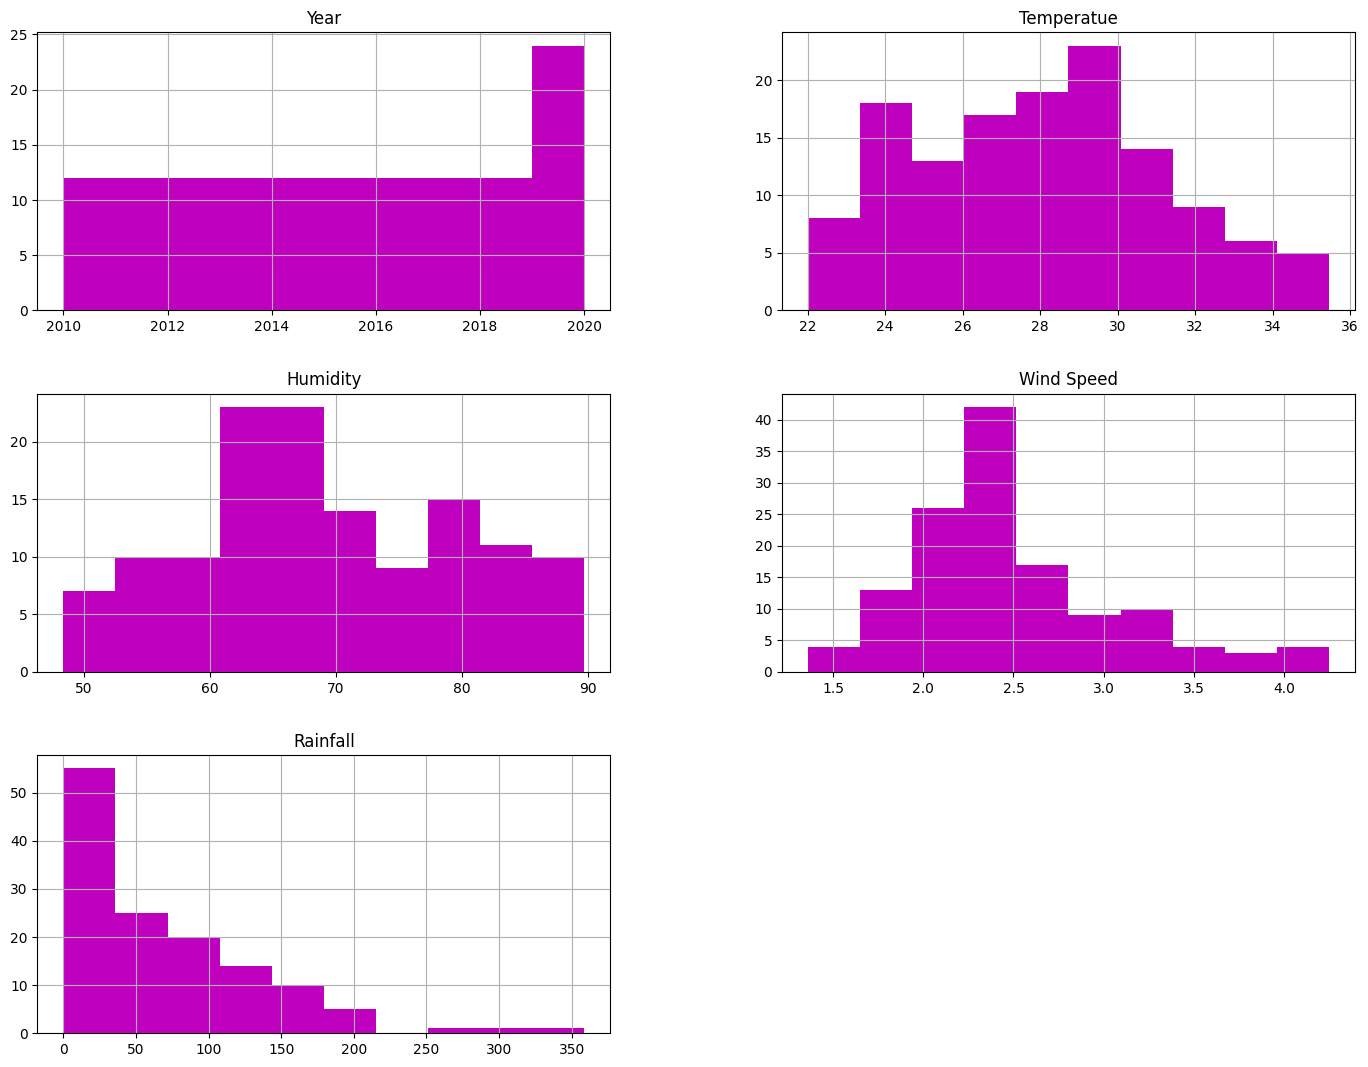

In [7]:
df.hist(figsize=(17,13), color="m");

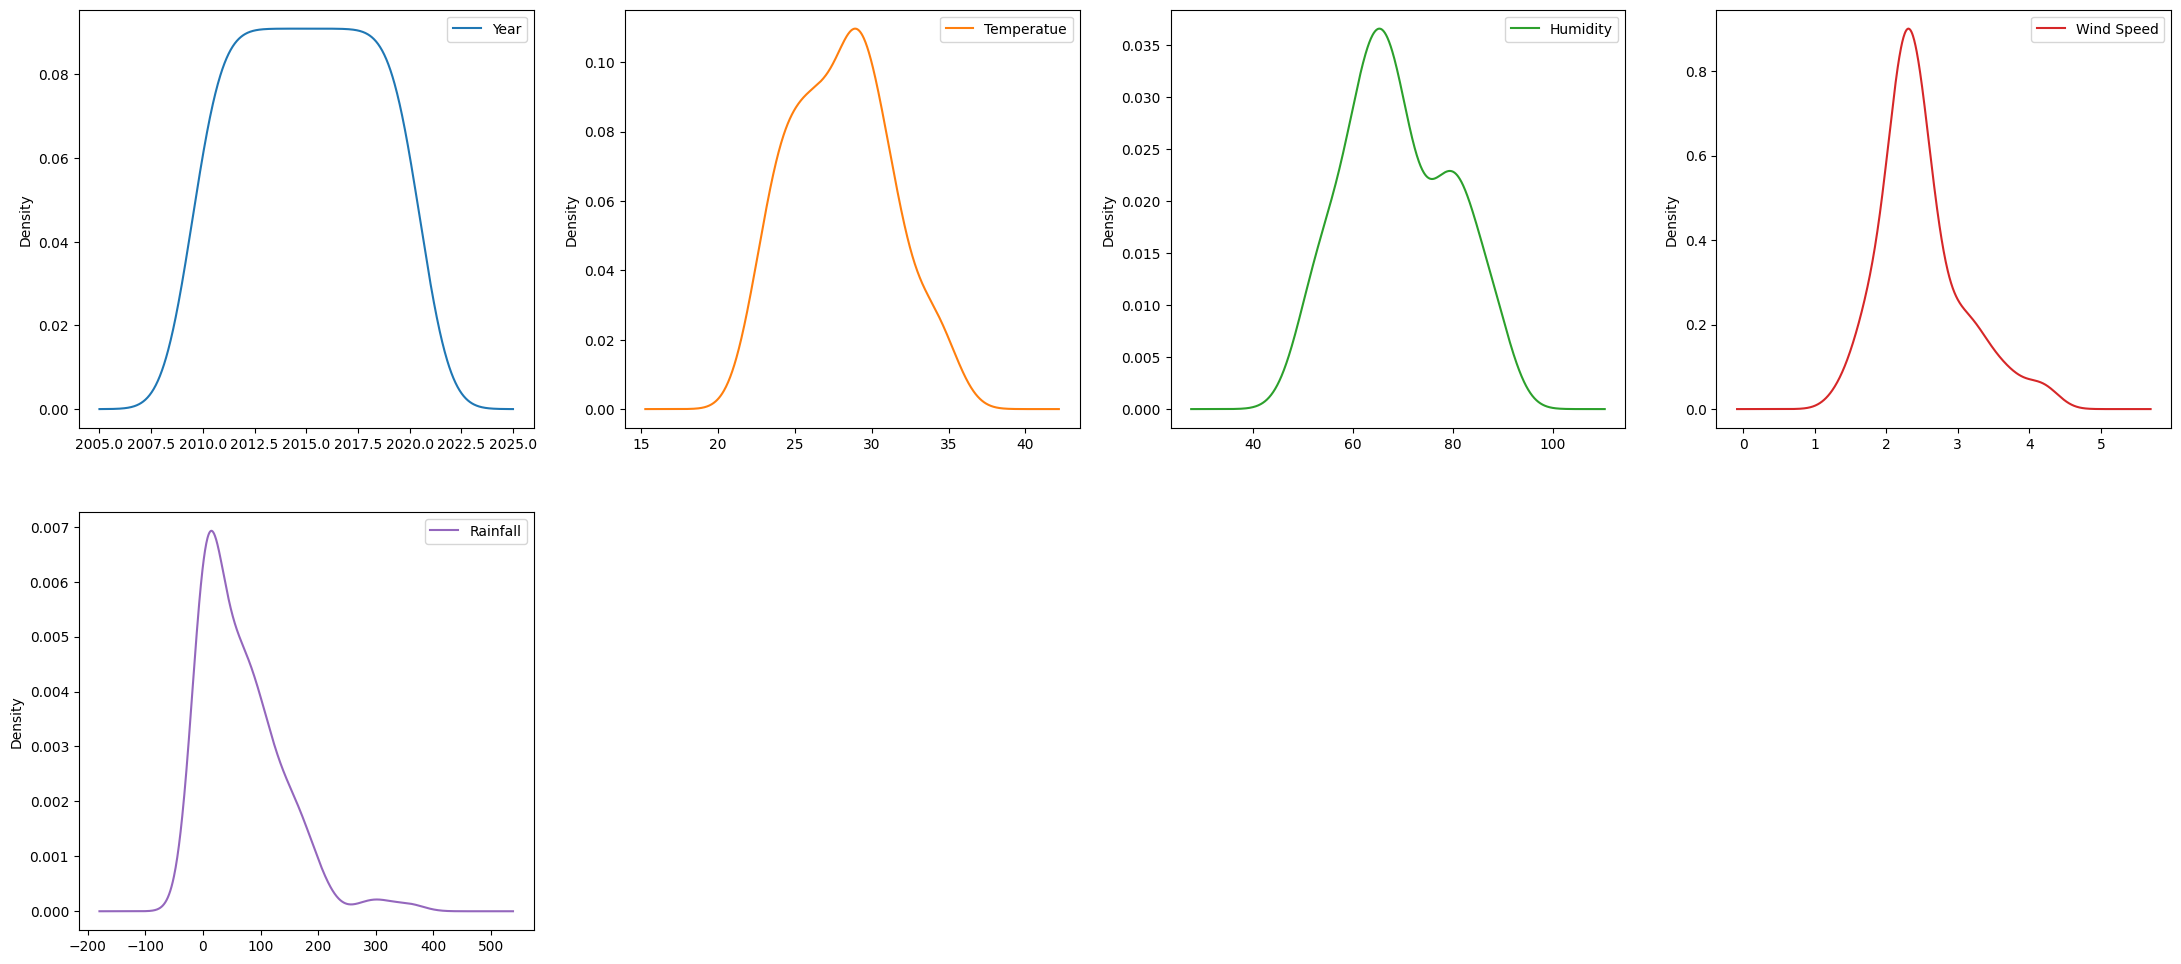

In [8]:
df.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

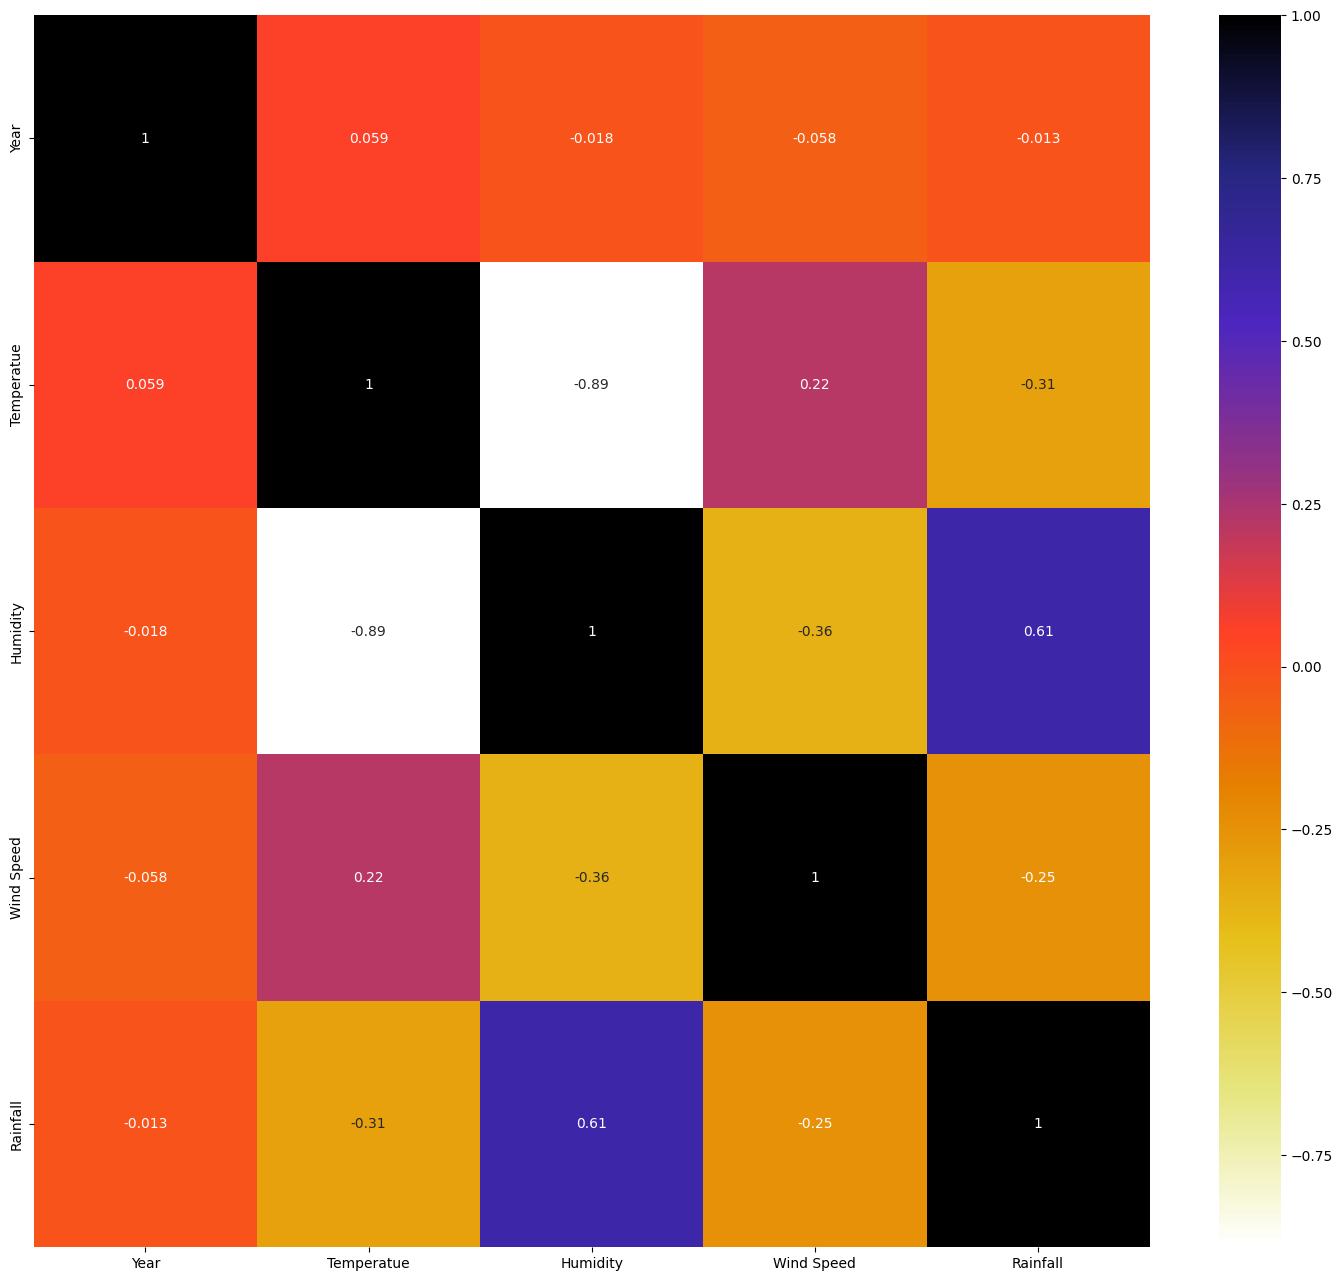

In [9]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

### Checking the dimensions

In [10]:
df.shape

(132, 5)

### Checking for missing values

In [11]:
## replace ? with NaN
df = df.replace('0.00', np.NaN)

In [12]:
df.isnull().sum().max()

0

In [13]:
df = df.replace(np.NaN,0)
#df = df.dropna()
df.isnull().sum().max()

0

In [14]:
df['Rainfall'] = df['Rainfall'].astype(int)

In [15]:
df.head(10)

,Year,Temperatue,Humidity,Wind Speed,Rainfall
0,2010,24.33,77.06,2.40,5
1,2010,27.08,66.12,2.22,0
2,2010,31.68,54.19,2.27,0
3,2010,33.92,53.94,2.25,26
4,2010,31.23,65.31,2.58,89
5,2010,28.65,69.38,3.20,84
6,2010,27.73,69.56,3.20,68
7,2010,27.57,74.00,2.61,163
8,2010,26.80,76.62,2.03,84
9,2010,26.35,80.19,1.78,126


In [16]:
new_df = df

**Fuzzification**

Fuzzification is the process of converting a crisp input value to a fuzzy value that is performed by the use of the information in the knowledge base.

In [17]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# convert Rainfall Data to Different categoricous
Weather = ['Wont Rain','Might Rain','Will Be Rain']
new_df['Target'] = '0'
# New Antecedent/Consequent objects hold universe variables and membership
# functions
Temperatue = ctrl.Antecedent(np.arange(0, 40, 1), 'Temperatue' )
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity' )
Rainfall = ctrl.Consequent(np.arange(0, 301, 1), 'Rainfall' )
new_df.loc[(new_df.Rainfall == 0) & (new_df.Rainfall<=20), 'Target'] = '0'
new_df.loc[(new_df.Rainfall >= 21) & (new_df.Rainfall <= 80), 'Target'] = '1'
new_df.loc[(new_df.Rainfall > 81), 'Target'] = '2'
new_df.head(50)

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010,24.33,77.06,2.40,5,0
1,2010,27.08,66.12,2.22,0,0
2,2010,31.68,54.19,2.27,0,0
3,2010,33.92,53.94,2.25,26,1
4,2010,31.23,65.31,2.58,89,2
5,2010,28.65,69.38,3.20,84,2
6,2010,27.73,69.56,3.20,68,1
7,2010,27.57,74.00,2.61,163,2
8,2010,26.80,76.62,2.03,84,2
9,2010,26.35,80.19,1.78,126,2


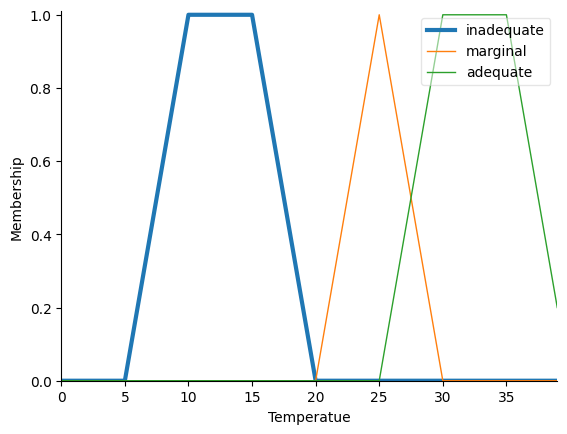

In [18]:
Temperatue[ 'inadequate' ] = fuzz.trapmf(Temperatue.universe, [ 5, 10, 15, 20])
Temperatue[ 'marginal' ] = fuzz.trimf(Temperatue.universe, [ 20, 25, 30])
Temperatue[ 'adequate' ] = fuzz.trapmf(Temperatue.universe, [ 25, 30, 35,40])
# You can see how these look with .view()
Temperatue[ 'inadequate' ].view()

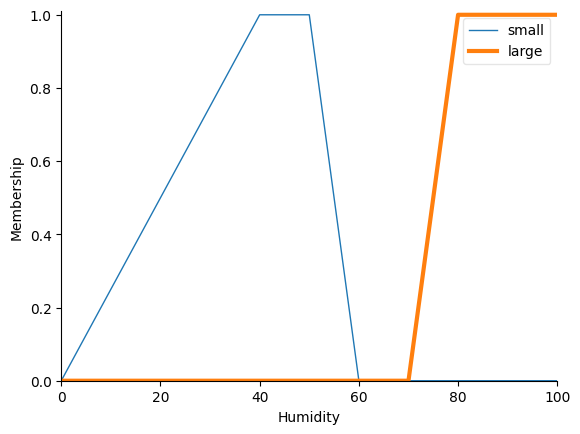

In [19]:
Humidity[ 'small' ] = fuzz.trapmf(Humidity.universe, [ 0, 40, 50, 60])
Humidity[ 'large' ] = fuzz.trapmf(Humidity.universe, [ 70, 80, 100, 100])
# Custom membership functions can be built interactively with a familiar,
Humidity['large'].view()

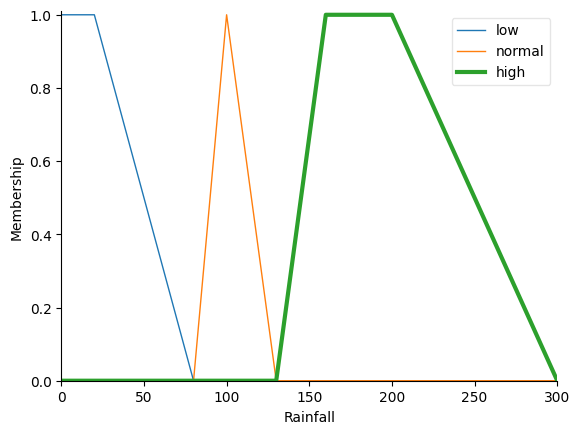

In [20]:
# Pythonic API
Rainfall[ 'low' ] = fuzz.trapmf(Rainfall.universe, [ 0,0,20, 80])
Rainfall[ 'normal' ] = fuzz.trimf(Rainfall.universe, [ 80, 100, 130])
Rainfall[ 'high' ] = fuzz.trapmf(Rainfall.universe, [ 130, 160, 200,300 ])
Rainfall['high'].view()

### Train -Test Split

In [21]:
df= new_df
df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010,24.33,77.06,2.40,5,0
1,2010,27.08,66.12,2.22,0,0
2,2010,31.68,54.19,2.27,0,0
3,2010,33.92,53.94,2.25,26,1
4,2010,31.23,65.31,2.58,89,2
...,...,...,...,...,...,...
127,2020,27.44,75.31,2.62,100,2
128,2020,26.13,80.12,2.35,158,2
129,2020,25.75,81.50,1.82,100,2
130,2020,24.61,85.31,2.30,179,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        132 non-null    int64  
 1   Temperatue  132 non-null    float64
 2   Humidity    132 non-null    float64
 3   Wind Speed  132 non-null    float64
 4   Rainfall    132 non-null    int64  
 5   Target      132 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 6.3+ KB


In [23]:
df = df.astype('float64')

In [24]:
df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010.0,24.33,77.06,2.40,5.0,0.0
1,2010.0,27.08,66.12,2.22,0.0,0.0
2,2010.0,31.68,54.19,2.27,0.0,0.0
3,2010.0,33.92,53.94,2.25,26.0,1.0
4,2010.0,31.23,65.31,2.58,89.0,2.0
...,...,...,...,...,...,...
127,2020.0,27.44,75.31,2.62,100.0,2.0
128,2020.0,26.13,80.12,2.35,158.0,2.0
129,2020.0,25.75,81.50,1.82,100.0,2.0
130,2020.0,24.61,85.31,2.30,179.0,2.0


Model Training - LSTM

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from tensorflow.keras.layers import Embedding

In [26]:
new_df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010,24.33,77.06,2.40,5,0
1,2010,27.08,66.12,2.22,0,0
2,2010,31.68,54.19,2.27,0,0
3,2010,33.92,53.94,2.25,26,1
4,2010,31.23,65.31,2.58,89,2
...,...,...,...,...,...,...
127,2020,27.44,75.31,2.62,100,2
128,2020,26.13,80.12,2.35,158,2
129,2020,25.75,81.50,1.82,100,2
130,2020,24.61,85.31,2.30,179,2


In [27]:
label = new_df['Target']
new_df=new_df.drop(["Target"],axis=1)

In [28]:
X=new_df
X.shape

(132, 5)

In [29]:
y=label
y.shape

(132,)

In [30]:
y=y.to_numpy()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
#y

In [32]:
print(X.shape)
print(y.shape)

(132, 5)
(132, 3)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [34]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(27, 5)
(27, 3)
(105, 5)
(105, 3)


In [35]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))

**Model Training**

In [36]:
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten

tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(128, input_shape=(1,5),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            68608     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 200579 (783.51 KB)
Trainable params: 200579 (783.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs = 150, validation_data= (X_test, y_test))
history

Epoch 1/150
4/4 [==============================] - 6s 317ms/step - loss: 0.6919 - accuracy: 0.5333 - val_loss: 0.6899 - val_accuracy: 0.5556
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.6888 - accuracy: 0.6286 - val_loss: 0.6873 - val_accuracy: 0.5185
Epoch 3/150
4/4 [==============================] - 0s 32ms/step - loss: 0.6853 - accuracy: 0.6286 - val_loss: 0.6843 - val_accuracy: 0.5556
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.6815 - accuracy: 0.6190 - val_loss: 0.6809 - val_accuracy: 0.4815
Epoch 5/150
4/4 [==============================] - 0s 52ms/step - loss: 0.6770 - accuracy: 0.6476 - val_loss: 0.6771 - val_accuracy: 0.4815
Epoch 6/150
4/4 [==============================] - 0s 46ms/step - loss: 0.6711 - accuracy: 0.6571 - val_loss: 0.6726 - val_accuracy: 0.4815
Epoch 7/150
4/4 [==============================] - 0s 67ms/step - loss: 0.6642 - accuracy: 0.6571 - val_loss: 0.6674 - val_accuracy: 0.4815
Epoch 8/150
4/4 [==

In [38]:
ans=model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=np.argmax(ans, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

In [40]:
from sklearn.metrics import accuracy_score
DLNN_acc= accuracy_score(y_pred, y_test)
print("LSTM Accuracy: ", DLNN_acc)

LSTM Accuracy:  0.9259259259259259


In [41]:
cm

array([[ 8,  1,  0],
       [ 0, 10,  1],
       [ 0,  0,  7]])

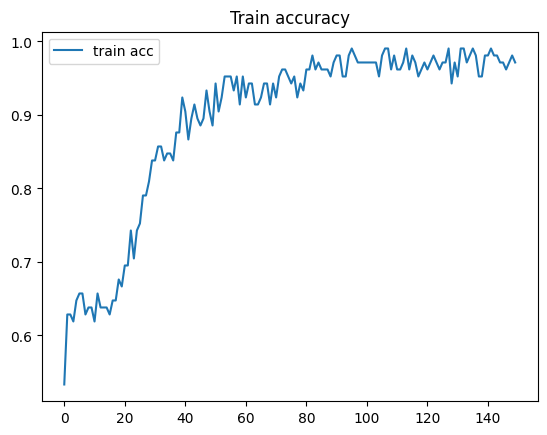

In [42]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.title("Train accuracy")
plt.show()

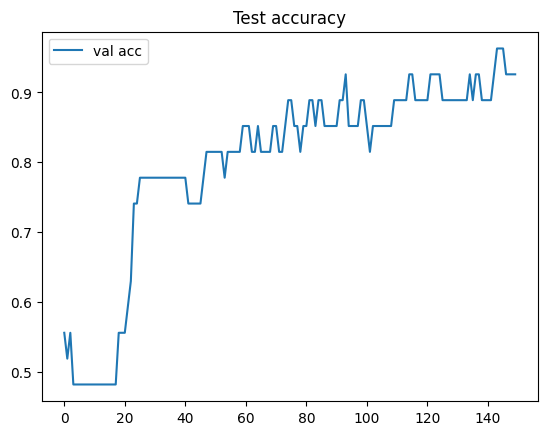

In [43]:
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Test accuracy")
plt.show()

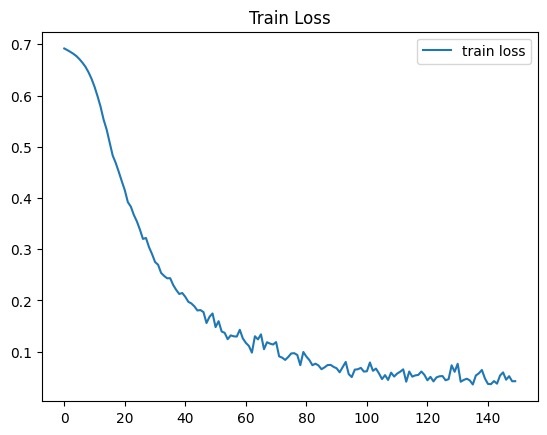

In [44]:
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.title('Train Loss')
plt.show()

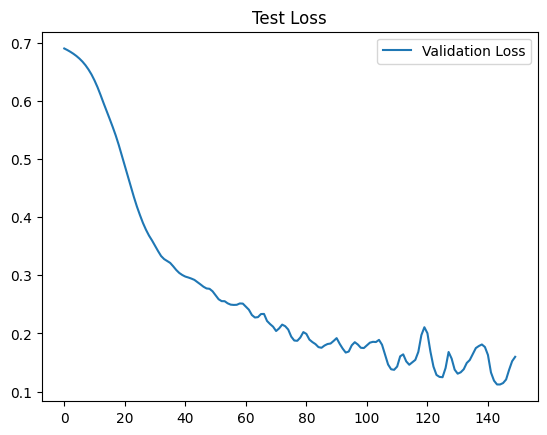

In [45]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Test Loss')
plt.show()

In [46]:
from sklearn.metrics import precision_score

In [47]:
# calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print('Precision of LSTM: %.3f' % precision)

Precision of LSTM: 0.926


In [48]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

In [49]:
#sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity of LSTM: ', sensitivity1 )

Sensitivity of LSTM:  0.8888888888888888


In [50]:
#specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity of LSTM: ', specificity1)

Specificity of LSTM:  1.0


<Axes: >

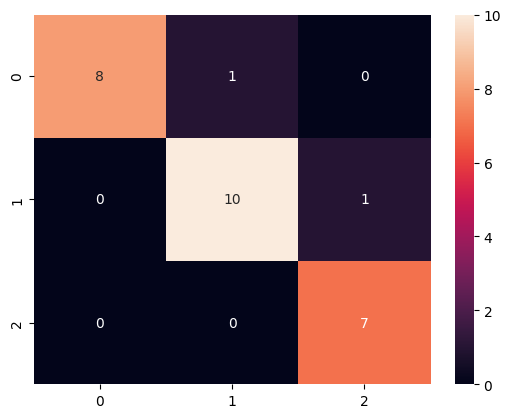

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

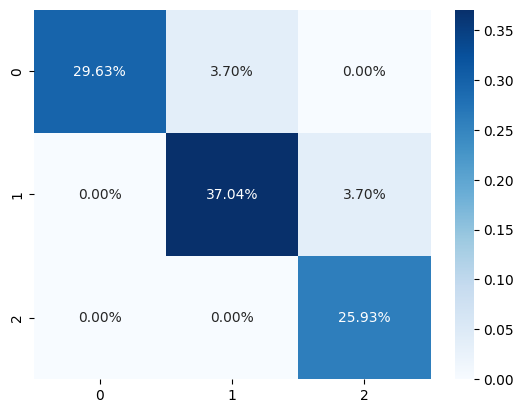

In [52]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [53]:
TP=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TN=cm[1][1]

In [54]:
from sklearn.metrics import precision_recall_fscore_support


In [55]:
acc_best=(TP+TN)/(TP+FN+FP+TN)
print("acc_best",acc_best)
sum=0
for i in range(1,100+1,1):
    sum=sum+pow(acc_best,i)
print("sum",sum)
av_acc=sum/100
print("Average Recall av_acc",av_acc)

acc_best 0.9473684210526315
sum 17.919246208880338
Average Recall av_acc 0.17919246208880338


In [56]:
sens_best=TP/(TP+FN)
sum=0
print("sens_best",sens_best)
for i in range(1,101,1):
    sum=sum+pow(sens_best,i)
print("sum",sum)
av_sens=sum/100
print("Average Recall av_sens",av_sens)

sens_best 0.8888888888888888
sum 7.999938646726098
Average Recall av_sens 0.07999938646726097


In [57]:
prec_best=TP/(FP+TP)
sum=0
print("prec_best",prec_best)
for i in range(1,101,1):
    sum=sum+pow(prec_best,i)
print("sum",sum)
av_prec=sum/100
print("Average Precision av_prec",av_prec)

prec_best 1.0
sum 100.0
Average Precision av_prec 1.0


### Classification Report

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.91      0.91      0.91        11
           2       0.88      1.00      0.93         7

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27



**Defuzzification**

In [59]:
X_test[0]

array([[-1.58113883,  0.20092082,  0.0332734 ,  1.23803389,  0.2595984 ]])

In [60]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [61]:
rule1 = ctrl.Rule(Temperatue[ 'adequate' ] | Humidity[ 'small' ], Rainfall[ 'low' ])
rule2 = ctrl.Rule(Humidity[ 'small' ] & Temperatue[ 'marginal' ], Rainfall[ 'normal' ])
rule3 = ctrl.Rule(Temperatue[ 'inadequate' ] | Humidity[ 'large' ], Rainfall[ 'high' ])
# make a prediction using Proposed Model
row = [[X_test[0]]]
ans=model.predict(X_test)
#yhat = model.predict(ans)
yhat = np.argmax(ans, axis = 1)
Weather = Weather[yhat[0]]

1/1 [==============================] - 0s 38ms/step


In [62]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
final_risk = ctrl.ControlSystemSimulation(risk_ctrl)

In [84]:
final_risk.input[ 'Temperatue' ] = 24.61
final_risk.input[ 'Humidity' ] = 85.31

201.11111111111137


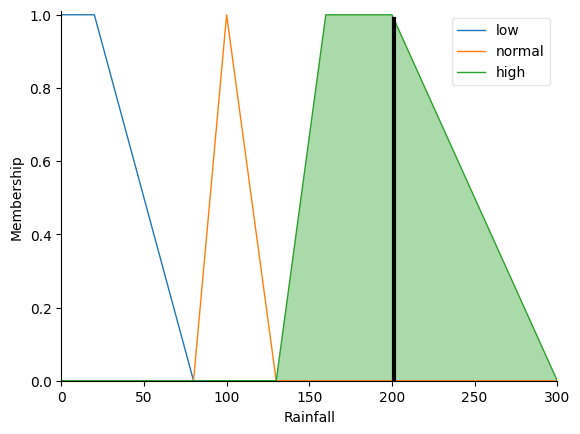

In [85]:
final_risk.compute()

print (final_risk.output[ 'Rainfall' ])
Rainfall.view(sim=final_risk)

# Comparison Graph

In [65]:
ANN = 0.88
LSTM  = 0.91

pre_ANN = 0.88
pre_lstm = 0.89

sensi_ANN = 0.88
sensi_lstm = 0.88

Speci_ANN = 0.99
Speci_lstm = 1.0

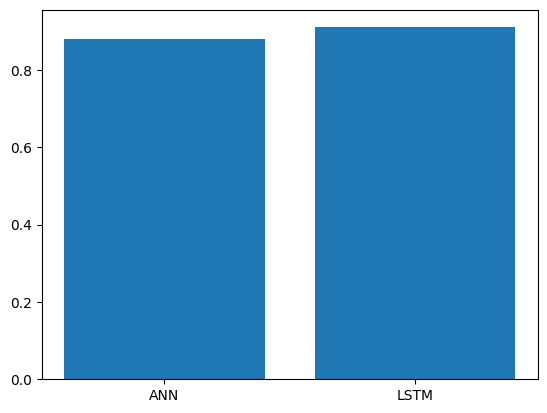

In [66]:
from statistics import mean, stdev
import matplotlib.pyplot as plt
ANN_Acc=[ANN]
LSTM_Acc=[LSTM]
ANN_mean = mean(ANN_Acc)
LSTM_mean = mean(LSTM_Acc)
plt.bar(['ANN','LSTM'],[ANN_mean,LSTM_mean])
plt.show()

### Specificity

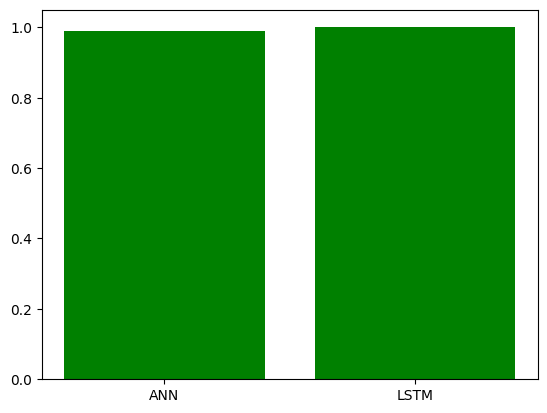

In [67]:
Spec2=[Speci_ANN]
Spec3=[Speci_lstm]
Spec2_mean = mean(Spec2)
Spec3_mean = mean(Spec3)
plt.bar(['ANN','LSTM'],[Spec2_mean,Spec3_mean],color='green')
plt.show()

### Sensitivity

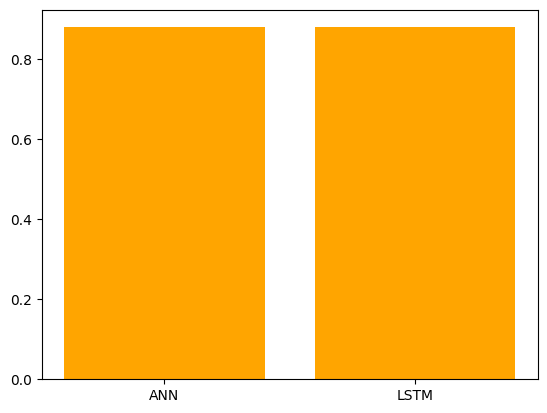

In [68]:
Sec2=[sensi_ANN]
Sec3=[sensi_lstm]
Sec2_mean = mean(Sec2)
Sec3_mean = mean(Sec3)
plt.bar(['ANN','LSTM'],[Sec2_mean,Sec3_mean],color='orange')
plt.show()

### Precision

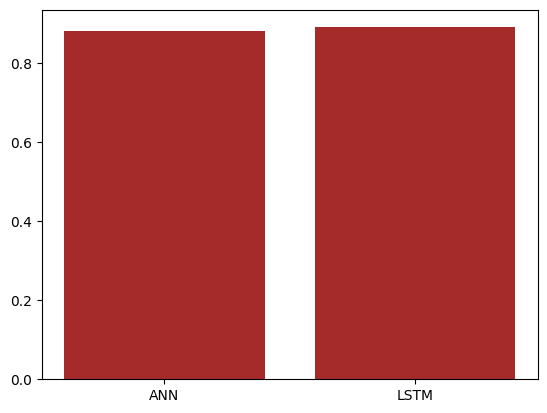

In [69]:
pec2=[pre_ANN]
pec3=[pre_lstm]
pec2_mean = mean(pec2)
pec3_mean = mean(pec3)
plt.bar(['ANN','LSTM'],[pec2_mean,pec3_mean], color='brown')
plt.show()